# CS 436 / 536: Introduction to Machine Learning
# Spring 2022
## Learning with Regularization and Validation

##### This file relies upon several functions implemented previously in the notebook on Linear Models.

In [ ]:
# TODO-1: import functions from HW3 (or directly copy-paste any functions)
# e.g., from ipynb.fs.full.LinearModels import *  

In [88]:
Xdigitstrain, ydigitstrain = readData('ZipDigits.train')

Ndigitstrain, pixels = Xdigitstrain.shape

assert(Ndigitstrain == ydigitstrain.shape[0])

print(f'Xdigitstrain shape {Xdigitstrain.shape}, ydigitstrain shape {ydigitstrain.shape}')

X shape: (7291, 256)
y shape: (7291, 1)
Xdigitstrain shape (7291, 256), ydigitstrain shape (7291, 1)


In [89]:
Xdigitstest, ydigitstest = readData('ZipDigits.test')

Ndigitstest, pixels = Xdigitstest.shape

assert(Ndigitstest == ydigitstest.shape[0])

print(f'Xdigitstest shape {Xdigitstest.shape}, ydigitstest shape {ydigitstest.shape}')

X shape: (2007, 256)
y shape: (2007, 1)
Xdigitstest shape (2007, 256), ydigitstest shape (2007, 1)


## Feature Normalization

### Compute 'Augmented' Feature Matrix

In [90]:
print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

Naugtrain, d = Xaugtrain.shape

print(f'Xaugtrain shape {Xaugtrain.shape}')

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Xaugtrain shape (7291, 3)


In [91]:
print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

Naugtest, d = Xaugtest.shape

print(f'Xaugtest shape {Xaugtest.shape}')

Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)
Xaugtest shape (2007, 3)


### Combine Data

#### Wait a minute... But I thought...

Well, Yes...

In [92]:
Xaug = np.concatenate((Xaugtrain, Xaugtest), axis=0)
Naug, d = Xaug.shape
ycombined = np.concatenate((ydigitstrain, ydigitstest), axis=0)

assert(Xaug.shape[0] == Ndigitstrain + Ndigitstest)
assert(ycombined.shape[0] == Ndigitstrain + Ndigitstest)

print(f'Xaug shape {Xaug.shape}, ycombined shape {ycombined.shape}')

Xaug shape (9298, 3), ycombined shape (9298, 1)


### Normalize Features

#### Warning! What is happening here? What are we doing here?

In [ ]:
def normalize(X, a=-1, b=1):
    N, d = X.shape
    Xnorm = np.ones((N, d))
    for col in range(1, d, 1):
        Xcol = X[:, col]
        # TODO-2: Complete this implementation
        # Xcolnorm = ?
        Xnorm[:, col] = Xcolnorm
    return Xnorm

In [94]:
Xnorm = normalize(Xaug)
N, d = Xnorm.shape

assert(Xnorm.shape == Xaug.shape)
assert(np.all( Xnorm[:, 0] == np.ones((N, 1)) ))

##### Well okay, it seems convenient to do some things this way

### Setup Labels for the 1s vs Non 1s Classification Task

In [95]:
for n in range(N):
    if ycombined[n, 0] == 1:
        ycombined[n, 0] = 1
    else:
        ycombined[n, 0] = -1

## Train-Test Split

### Randomly select $K$ data points from the input data

In [ ]:
def splitDataSelectKRandomly(X, y, K):
    '''
    Partitions the input dataset with N data points given by X and y into two parts, 
    one with K of the data points selected uniformly at random, and
    the other with the remaining N-K data points
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        K: an integer; number of data points to select
    Output:
        Xselected: a 2 dimensional K x d numpy array, K data points selected from X uniformly at random
        yselected: a 2 dimensional K x 1 numpy array, the labels from the input y corresponding to the examples selected in Xselected
        Xremaining: a 2 dimensional N-K x d numpy array
        yremaining: a 2 dimensional N-K x 1 numpy array
    '''
    N, d = X.shape
    # TODO-3: Complete this implementation
    # E.g. Xselected = Xnorm[selectedrows, :]
    return Xselected, yselected, Xremaining, yremaining

In [97]:
X, y, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 300)

print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
X shape {X.shape} y shape {y.shape}\n\
Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
X shape (300, 3) y shape (300, 1)
Xtest shape (8998, 3), ytest shape (8998, 1)


### Visualize the Data

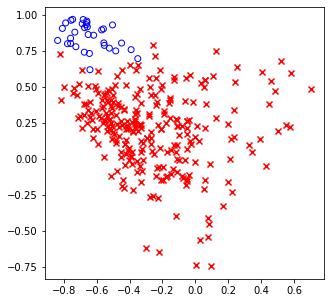

In [98]:
fig, axs = plt.subplots(figsize=(5, 5))
plus1s = np.where(y == 1)[0]
minus1s = np.where(y == -1)[0]
Xplus1s = X[plus1s, :]
Xminus1s = X[minus1s, :]
axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
            color='blue', facecolors='none', label='1')
axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
            marker='x', color='red', label='Not 1')

## Polynomial Transform Revisited - Using Legendre Polynomials

### Compute the Legendre Polynomials at a value of the input variable $x$

For non-negative integer $q$, let $L_q(x)$ denote the $q$-th degree Legendre polynomial

$L_0(x)=1$

$L_1(x)=x$

And for any $k\in\{2,3,\dots\}$

$L_k(x)=\frac{2k-1}{k}xL_{k-1}(x) - \frac{k-1}{k}L_{k-2}(x)$

See LFD Problem 4.3 for more details.

In [ ]:
def LegendrePolynomials(x, Q):
    '''
    Compute the values of Legendre polynomials with degrees 0, 1, 2, ..., Q at the input x
    Input:
        x: a real number
        Q: a positive integer
    Output:
        L: a list with Q+1 entries,
           where for any k=0, 1, ..., Q, 
           L[k] is the value of the k-th order Legendre polynomial at x
    '''
    L = [1, x]
    # TODO-4: Complete the implementation
    return L

### Compute the Legendre Polynomial Feature Transform

$\begin{bmatrix} 1\\ x_1\\ x_2\end{bmatrix} \to 
\begin{bmatrix} 1\\ L_1(x_1)\\ L_1(x_2)\\ L_2(x_1)\\ L_1(x_1)L_1(x_2)\\ L_2(x_2)\\ L_3(x_1)\\ L_2(x_1)L_1(x_2)\\ L_1(x_1)L_2(x_2)\\ L_3(x_2)\\ \vdots \end{bmatrix}$

In [ ]:
def polynomialTransformLegendre(X, Q):
    '''
    Compute the Legendre Polynomial Feature Transform
    See LFD Example 3.3
    Input:
        X: A 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        Q: The desired degree of polynomial
    Output:
        Z: A 2 dimensional N x d_tilde numpy array
           The n-th row Z[n, :] contains features corresponding to the Q-th order polynomial transform of X[n, :]
           Z[n, 0] = 1
           Z[n, 1], ..., Z[d_tilde] contain the transformed features
    Warning and TODO-5 (20 points): This is a hack! Can we do better?
    '''
    N, d = X.shape
    if np.all(X[:, 0] == np.ones((N, 1))):
        X = X[:, 1:]
    N, d = X.shape

    '''
    Setup
    '''
    degrees = range(Q+1)
    perms = permutations(range(d))
    perms = list(perms)
    combs = combinations_with_replacement(degrees, d)
    combs = list(combs)
    '''
    List feature names
    '''
    terms = []
    ftnames = []
    for c in combs:
        if np.sum(c) == 0:
            continue
        if np.sum(c) > Q:
            continue
        for p in perms:
            ftname = '*'.join(sorted([f'L_{c[col]}(x[{p[col]}])' for col in range(d)]))
            if ftname in ftnames:
                continue
            terms.append((c, p))
            ftnames.append(ftname)
    '''
    Compute features
    '''
    Z = []
    for n in range(N):
        row = [1]
        x = X[n, :]
        z = []
        Ls = [LegendrePolynomials(x[col], Q) for col in range(d)]
        for t in terms:
            (c, p) = t
            v = np.prod([Ls[p[i]][c[i]] for i in range(d)])
            z.append(v)
        z = [1] + z
        Z.append(z)
    Z = np.array(Z)
    return Z    

In [101]:
Q = 6

Z = polynomialTransformLegendre(X, Q)
print(f'Z shape {Z.shape}')
Ztest = polynomialTransformLegendre(Xtest, Q)
print(f'Ztest shape {Ztest.shape}')

Z shape (300, 22)
Ztest shape (8998, 22)


In [102]:
'''
Updated plotting routine to use Legendre Polynomial transform instead
'''
def plotNonLinearSeparator(w, X, y, Q=2, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by a non-linear separator in 2D space
    which is picked from a linear model in higher dimensional space 
    using the polynomial transform
    Input:
        w: a d x 1 2 dimensional numpy array of weights for a linear hypothesis
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        Q: The desired degree of polynomial
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 100)
    pltx2s = np.linspace(-1, 1, 100)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    # a function that performs the polynomial transform
    pltZ = polynomialTransformLegendre(pltX, Q=Q)
    pltyhat = predictClassLinear(w, pltZ)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.show()

## Linear Regression with Regularization: The One Step $E_\text{aug}$ Minimizing Algorithm

Minimize the augmented error with weight decay regularization. See Lecture 11.

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels

- $\lambda$: Regularization parameter

Compute weights $w$ to represent a linear hypothesis which has minimum augmented error $E_{\text{aug}}(w)=E_{\text{in}}(w) + \lambda w^T w$. Here: 
- $E_{\text{in}}(w)=\frac{1}{N}(w^TX^TXw-2w^TX^Ty+y^Ty)$ is the sum of squared errors of the predictions made by the linear hypothesis with weights $w$, whose predictions are given by the $N\times 1$ vector $\hat{y}=Xw$.
- $\lambda w^T w$ is the weight decay regularization term which penalizes a linear hypothesis with weights $w$ by $\lambda$ times the sum of squares of the components of the weights.

Output $w_\text{reg}\in\arg\min_{w\in\mathbb{R}^d}E_{\text{aug}}(w)$.

$w_{\text{reg}}\gets (X^TX + \lambda I)^{-1}X^T y$, if $X$ is invertible.

##### Tip: See <a href="https://numpy.org/doc/stable/reference/generated/numpy.identity.html#numpy-identity">numpy.identity()</a> to produce the identity matrix. You may continue to use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html#numpy-linalg-pinv">numpy.linalg.pinv()</a> to compute the inverse of a matrix, even one which is invertible.

### Sum of Squared Errors

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels See Lecture 11.

$E_{X,y}(w)=\frac{1}{N}(w^TX^TXw-2w^TX^Ty+y^Ty)$ is the sum of squared errors of the predictions made by the linear hypothesis with weights $w$, whose predictions are given by the $N\times 1$ vector $\hat{y}=Xw$.

In [ ]:
'''
The Sum or Squared Errors
'''

def squaredError(w, X, y):
    '''
    point-wise sum of squared error (for regression)
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
    Output:
        error: sum of squared errors of hypothesis w on data points in X with true labels y
    '''
    # TODO-6: Complete this implementation
    return error

### Linear Regression with Regularization

Given:

- $X$: $N\times d$ 'augmented' matrix of $N$ data points with $d$ features.

- $y$: $N\times 1$ vector of labels

- $\lambda$: Regularization parameter

Output $w_\text{reg}\in\arg\min_{w\in\mathbb{R}^d}E_{\text{aug}}(w)$, where $E_{\text{aug}}(w)=E_{\text{in}}(w) + \lambda w^T w$.

$w_{\text{reg}}\gets (X^TX + \lambda I)^{-1}X^T y$, if $X$ is invertible.

In [ ]:
'''
The one-step optimal algorithm for Linear Regression
'''

def linearRegressionRegularized(X, y, lamda):
    '''
    Implements the one-step algorithm for Linear Regression
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        lamda: a non-negative real number which controls the amount of regularization
               called lamda instead of lambda because python has an in-built lambda
    Output:
        w: weights with lowest error on the input training set X, y
    '''
    N, d = X.shape
    # TODO-7: Compute the optimal weights which minimizes the sum of squared errors
    return w

### Experiments with Linear Regression with Regularization

In [105]:
lamda = 0
w_reg = linearRegressionRegularized(Z, y, lamda)

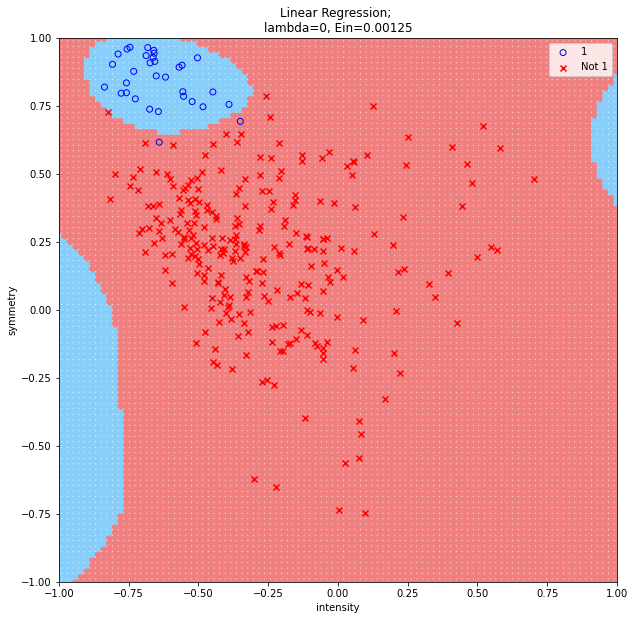

In [106]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

In [125]:
lamda = 10
w_reg = linearRegressionRegularized(Z, y, lamda)

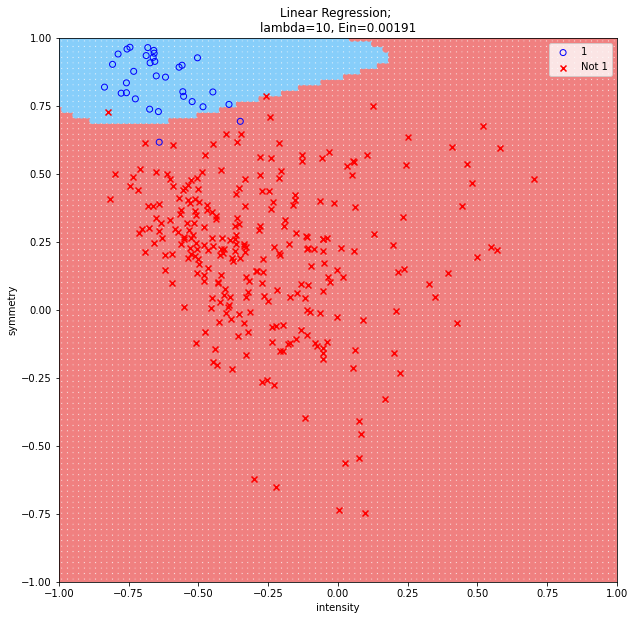

In [126]:
Ein = np.round(squaredError(w_reg, Z, y), 5)
plotNonLinearSeparator(w_reg, X, y, Q=Q,
                           title=f'Linear Regression; \nlambda={lamda}, Ein={Ein}')

## Leave-One-Out Cross Validation

See Lectures 22 and 23

In [ ]:
def linearRegressionCVError(X, y, lamda):
    '''
    Implements the one-step algorithm for Linear Regression
    Input:
        X: A 2 dimensional N x d numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        lamda: a non-negative real number which controls the amount of regularization
               called lamda instead of lambda because python has an in-built lambda
    Output:
        Ecv: The leave one out cross validation error of linear regression with regularization parameter lamda on data X, y
    '''
    N, d = X.shape
    Ecv = 0
    for n in range(N):
        # TODO-8: Complete this implementation
    return Ecv

### Experiments with Leave-One-Out Cross Validation

In [110]:
lamda = 0
Ecv = linearRegressionCVError(Z, y, lamda)
print(f'Linear Regression with Regularization with lambda={lamda}, Ecv = {Ecv}')

Linear Regression with Regularization with lambda=0, Ecv = 5.527952444108335e-06


### Experiments to Pick Regularization Parameter $\lambda$

Please try other values of $\lambda$ as well.

In [123]:
lamdas = [0, 0.001, 0.01, 0.1, 1, 10, 25, 50, 75, 100]
Ecvs = []

for lamda in lamdas:
    Ecv = linearRegressionCVError(Z, y, lamda)
    Ecvs.append(Ecv)

In [124]:
optlamda = lamdas[np.argmin(Ecvs)]

print(optlamda)

0.01
